# Simulation

We will discuss how to structure and implement simulation frameworks.

Reading: none

## Simulation Loop

Simulations require repeating the following procedure for each agent, for each timestep:
1. Actions have taken you to a new location
2. Make observations
3. Update your belief
4. Assess your next action
5. Act

![Simulation Loop](figures/sim_circle.png)

For games with perfect information you don't even need to make observations:
1. Assess your next action
2. Act

This extends to physics simulations as well. Here, assessing your next action simply means following the laws of physics.

## Bouncing Ball

With the systems we can derive the motion analytically.

$$y = 1-|\sin(t)|$$

In [1]:
using Interact, Compose, Colors, Random

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/790a2899848cb55930c57eec87df6d5182e9094b-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/790a2899848cb55930c57eec87df6d5182e9094b-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [2]:
function drawball(t)
    y = 1-abs(sin(t)) # The y coordinate.
    compose(context(), circle(0.5, y, 0.04))
end

@manipulate for t in 0:0.1:10
    drawball(t)
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:t=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:index=>Observable{Any} with 2 listeners. Value:
51,:formatted_vals=>Observable{Any} with 1 listeners. Value:
["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "9.1", "9.2", "9.3", "9.4", "9.5", "9.6", "9.7", "9.8", "9.9", "10.0"],:formatted_value=>Observable{String} with 1 listeners. Value:
"5.0",:value=>Observable{Float64} with 2 listeners. Value:
5.0), Observable{Float64} with 2 listeners. Value:
5.0, Scope("knockout-component-a7a09488-cd37-4391-828d-448c32d0e0bf", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["t"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any} with 1 listeners. Value:
["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "9.1", "9.2", "9.3", "9.4", "9.5", "9.6", "9.7", "9.8", "9.9", "10.0"], nothing),"changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"formatted_value"=>(Observable{String} with 1 listeners. Value:
"5.0", nothing),"index"=>(Observable{Any} with 2 listeners. Value:
51, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\mykel\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"formatted_vals\\\":[\\\"0.0\\\",\\\"0.1\

## N-Body Problem

The $n$-body problem refers to simulating orbiting bodies. With $n > 2$ there is no analytical solution.

Let us set up an $n$-body simulator.

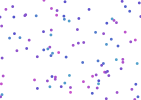

In [3]:
struct Pt
    x::Float64 # x-position
    y::Float64 # y-position
    u::Float64 # x-velocity
    v::Float64 # y-velocity
    color::Colorant
end

mutable struct State
    pts::Vector{Pt}
end

function render(pt::Pt)
   compose(context(), circle(pt.x, pt.y, 0.01), fill(pt.color))  
end

function render(s::State)
    compose(context(), map(render, s.pts)) 
end

function init()
    State([Pt(rand(), rand(), randn(), randn(), HSV(200 + 100*rand(), 0.6, 0.8)) for i=1:100])
end

render(init())

Each agent acts according to the law of gravitation:

$$F_{i} = \sum_{j=1}^N G \frac{m_i m_j}{r_{j\rightarrow i}^2} \hat{r}_{j\rightarrow i}$$

In [4]:
using LinearAlgebra

function act!(i::Int, s::State, dt::Float64)
    force = [0.0,0.0]
    I = s.pts[i]
    for (j,J) in enumerate(s.pts)
        if j != i
            u = [J.x - I.x, J.y - I.y]
            r = norm(u)
            u ./= r
            force += u ./ r^2
            force -= 0.1*u ./ r^3 # let's also include a `strong` force
        end
    end
    force .*= 0.01 # account for G and masses
    force = clamp!(force, -5.0, 5.0) # clamp to prevent explosions
    
    # adjust velocity according to force
    s.pts[i] = Pt(I.x, I.y, I.u + force[1]*dt, I.v + force[2]*dt, I.color)
end

function propagate!(i::Int, s::State, dt::Float64;
    friction::Float64=0.5, rebound::Float64=0.9)
    
    # update position based on velocity
    I = s.pts[i]
    x = I.x+I.u*dt
    y = I.y+I.v*dt
    u = I.u*friction
    v = I.v*friction
    
    # let's stay inside the box
    x = clamp(x, 0, 1)
    u = -u*rebound # lose energy on bounce and flip direction

    y = clamp(y, 0, 1)
    v = -v*rebound # lose energy on bounce and flip direction
    
    s.pts[i] = Pt(x, y, u, v, I.color)
    s
end

function animate(steps, dt=1/60)
    animation = Context[]
    s = init()
    for t = 1:steps
        for i in 1 : length(s.pts)
            act!(i, s, dt) 
        end
        for i in 1 : length(s.pts)
            propagate!(i, s, dt)
        end
        push!(animation, render(s))
    end
    return animation
end

animation = animate(1000)


@manipulate for i=1:length(animation)
    animation[i]
end

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:i=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 2 listeners. Value:
500), Observable{Int64} with 2 listeners. Value:
500, Scope("knockout-component-87e299f7-f9d4-493d-bf5e-c06dbb31b34d", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["i"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>1000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 2 listeners. Value:
500, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\mykel\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\mykel\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\mykel\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":500}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-87e299f7-f9d4-493d-bf5e-c06dbb31b34d\",\"id\":\"ob_10\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-87e299f7-f9d4-493d-bf5e-c06dbb31b34d\",\"id\":\"ob_09\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia

In [5]:
typeof(animation)

Array{Context,1}

## Sampling

Many simulations require random numbers, whether for random initialization, sampling from stochastic models, for for other purposes.

In [6]:
rand() # random number from 0 to 1

0.3708644790174327

In [7]:
rand(5) # 5 samples from rand

5-element Array{Float64,1}:
 0.46424383711645745  
 0.6101652555083659   
 0.8116907299343192   
 0.0805940504453222   
 0.0013866486015128299

In [8]:
randn() # normally distributed number (Gaussian with mean 0 and stdev 1)

0.9310985454694762

In [9]:
2 + 3*randn() # mean 2, stdev 3

-4.036156631205314

The Distributions package provides a large number of Distributions for your use. We have already seen many of them.
You can sample from them with `rand`.

In [10]:
using Distributions

N = Normal(2, 3) # mean 2, stdev 3
rand(N)

5.904302675973604

In [11]:
rand(N, 5) # five samples from N

5-element Array{Float64,1}:
 6.0503605799061315
 3.395968064930498 
 4.392718892658967 
 1.8011721811462338
 4.065838293409499 

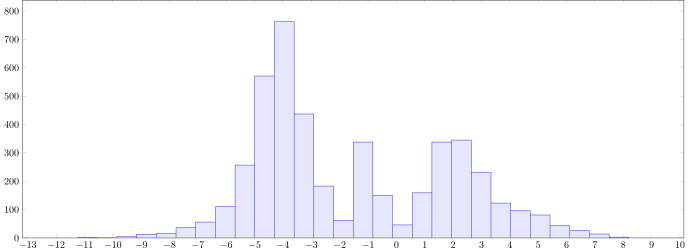

In [12]:
using PGFPlots

Random.seed!(0)
data = [randn(500).*1.8 .+ -5;
        randn(2000).*0.8 .+ -4;
        randn(500).*0.3 .+ -1;
        randn(1000).*0.8 .+ 2;
        randn(500).*1.5 .+ 4;
       ]
data = filter!(x->-15.0 <= x <= 15.0, data)
Axis(Plots.Histogram(data, bins=100), ymin=0, width="25cm", height="10cm")

In [13]:
using BayesNets

bn = BayesNet()
push!(bn, StaticCPD(:a, Normal(1.0))) # N(0,1)
push!(bn, LinearGaussianCPD(:b, [:a], [2.0], 3.0, 1.0)) # N(2a + 3, 1)

In [14]:
rand(bn)

Dict{Symbol,Any} with 2 entries:
  :a => 0.898579
  :b => 5.78921

In [15]:
rand(bn, 5)

,a,b
,Float64,Float64
1,-0.203858,2.81603
2,0.713441,5.19356
3,0.812238,4.32231
4,-0.506914,1.0289
5,1.36618,6.14882
